In [1]:
"""
後で使う関数の定義
"""

def linestyle_generator():
    """グラフをプロットするときの線種を決めるジェネレータ"""
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

def plot_set(fig_ax, *args):
    """グラフを整える"""
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args) == 3:
        fig_ax.legend(loc=args[2])

def bodeplot_set(fig_ax, *args):
    """ボード線図を整える"""
    # ゲイン線図
    fig_ax[0].grid(which="both", ls=':')
    fig_ax[0].set_ylabel('Gain [dB]')

    # 位相線図
    fig_ax[1].grid(which="both", ls=':')
    fig_ax[1].set_xlabel('omega [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')

    # 凡例
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

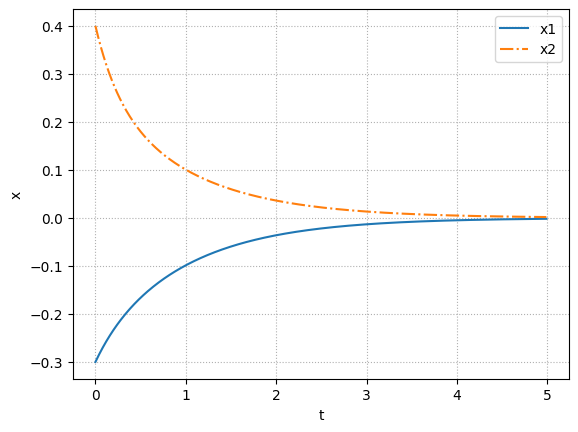

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from control.matlab import ss, initial

A = [[0, 1], [-4, -5]]
B = [[0], [1]]
C = np.eye(2)
D = np.zeros([2, 1])
P = ss(A, B, C, D)

Td = np.arange(0, 5, 0.01)
X0 = [-0.3, 0.4]
x, t = initial(P, Td, X0) # 初期値応答

fig, ax = plt.subplots()
ax.plot(t, x[:, 0], label='x1')
ax.plot(t, x[:, 1], ls='-.', label='x2')
plot_set(ax, 't', 'x', 'best')

In [11]:
import sympy as sp

sp.init_printing()
s = sp.Symbol('s')
t = sp.Symbol('t', positive=True)

A = np.array([[0, 1], [-4, -5]])
G = s * sp.eye(2) - A
exp_At = sp.inverse_laplace_transform(sp.simplify(G.inv()), s, t)
exp_At

⎡     -t    -4⋅t       -t    -4⋅t  ⎤
⎢  4⋅ℯ     ℯ          ℯ     ℯ      ⎥
⎢  ───── - ─────      ─── - ─────  ⎥
⎢    3       3         3      3    ⎥
⎢                                  ⎥
⎢     -t      -4⋅t     -t      -4⋅t⎥
⎢  4⋅ℯ     4⋅ℯ        ℯ     4⋅ℯ    ⎥
⎢- ───── + ───────  - ─── + ───────⎥
⎣    3        3        3       3   ⎦

In [14]:
from scipy.linalg import expm

A = np.array([[0, 1], [-4, -5]])
t = 5
expm(A * t) # `exp(A t)` を計算している

array([[ 0.00898393,  0.00224598],
       [-0.00898393, -0.00224598]])

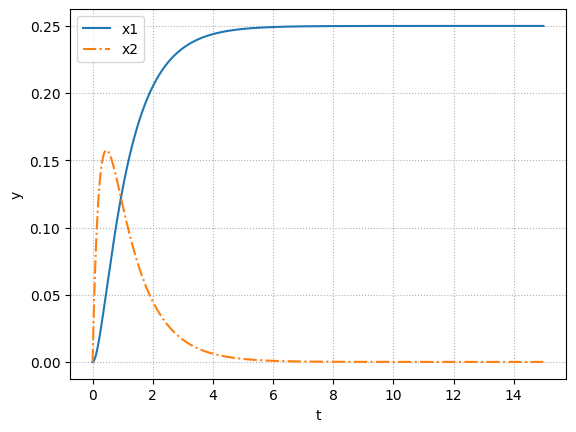

In [16]:
from control.matlab import step

"""ゼロ状態応答を調べる"""

Td = np.arange(0, 15, 0.01)
x, t = step(P, Td) # ステップ応答

fig, ax = plt.subplots()
ax.plot(t, x[:, 0], label='x1')
ax.plot(t, x[:, 1], ls='-.', label='x2')
plot_set(ax, 't', 'y', 'best')

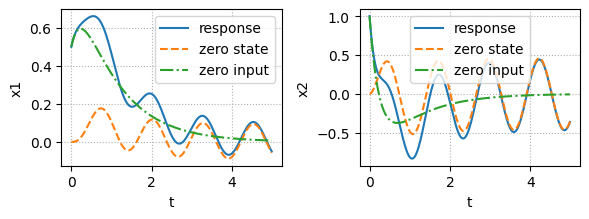

In [29]:
from control.matlab import lsim

Td = np.arange(0, 5, 0.01)
Ud = 3 * np.sin(Td * 5)
X0 = [0.5, 1.0]

xst, t, _ = lsim(P, Ud, Td) # ゼロ状態応答
xin, _ = initial(P, Td, X0) # ゼロ入力応答
x, _, _ = lsim(P, Ud, Td, X0)

fig, ax = plt.subplots(1, 2, figsize=(6, 2.3))
for i in [0, 1]:
    ax[i].plot(t, x[:, i], label="response")
    ax[i].plot(t, xst[:, i], ls="--", label="zero state")
    ax[i].plot(t, xin[:, i], ls="-.", label="zero input")

plot_set(ax[0], 't', 'x1', 'best')
plot_set(ax[1], 't', 'x2', 'best')
fig.tight_layout() # これがないと図が重なってしまう

In [ ]:
from control.matlab import lsim

Td = np.arange(0, 5, 0.01)
Ud = 1 * (Td >= 0) # ステップ入力
X0 = [-0.3, 0.4]

xst, t = step(P, Td) # ゼロ状態応答
xin, _ = initial(P, Td, X0) # ゼロ入力応答
x, _, _ = lsim(P, Ud, Td, X0) # ゼロ状態応答

fig, ax = plt.subplots(1, 2, figsize=(6, 2.3))
for i in [0, 1]:
    ax[i].plot(t, x[:, i], label="response")
    ax[i].plot(t, xst[:, i], ls="--", label="zero state")
    ax[i].plot(t, xin[:, i], ls="-.", label="zero input")

plot_set(ax[0], 't', 'x1', 'best')
plot_set(ax[1], 't', 'x2', 'best')
fig.tight_layout() # これがないと図が重なってしまう